# 导师制名企实训班商业智能方向 004期 Lesson 9

### Action 1: 二手车价格预测
used_car_train_20200313.csv  
used_car_testB_20200421.csv  
数据来自某交易平台的二手车交易记录  
https://tianchi.aliyun.com/competition/entrance/231784/introduction  
ToDo：给你一辆车的各个属性（除了price字段），预测它的价格  
使用神经网络来完成预测  

In [1]:
# 引包
import pandas as pd
import numpy as np

In [2]:
# 数据加载
train_data = pd.read_csv('data/used_car/used_car_train_20200313.csv', sep=' ')
train_data.head()

,SaleID,name,regDate,model,brand,bodyType,fuelType,gearbox,power,kilometer,...,v_5,v_6,v_7,v_8,v_9,v_10,v_11,v_12,v_13,v_14
0,0,736,20040402,30.0,6,1.0,0.0,0.0,60,12.5,...,0.235676,0.101988,0.129549,0.022816,0.097462,-2.881803,2.804097,-2.420821,0.795292,0.914762
1,1,2262,20030301,40.0,1,2.0,0.0,0.0,0,15.0,...,0.264777,0.121004,0.135731,0.026597,0.020582,-4.900482,2.096338,-1.030483,-1.722674,0.245522
2,2,14874,20040403,115.0,15,1.0,0.0,0.0,163,12.5,...,0.251410,0.114912,0.165147,0.062173,0.027075,-4.846749,1.803559,1.565330,-0.832687,-0.229963
3,3,71865,19960908,109.0,10,0.0,0.0,1.0,193,15.0,...,0.274293,0.110300,0.121964,0.033395,0.000000,-4.509599,1.285940,-0.501868,-2.438353,-0.478699
4,4,111080,20120103,110.0,5,1.0,0.0,0.0,68,5.0,...,0.228036,0.073205,0.091880,0.078819,0.121534,-1.896240,0.910783,0.931110,2.834518,1.923482


In [3]:
test_data = pd.read_csv('data/used_car/used_car_testB_20200421.csv', sep=' ')
test_data.head()

,SaleID,name,regDate,model,brand,bodyType,fuelType,gearbox,power,kilometer,...,v_5,v_6,v_7,v_8,v_9,v_10,v_11,v_12,v_13,v_14
0,200000,133777,20000501,67.0,0,1.0,0.0,0.0,101,15.0,...,0.236520,0.000241,0.105319,0.046233,0.094522,3.619512,-0.280607,-2.019761,0.978828,0.803322
1,200001,61206,19950211,19.0,6,2.0,0.0,0.0,73,6.0,...,0.261518,0.000000,0.120323,0.046784,0.035385,2.997376,-1.406705,-1.020884,-1.349990,-0.200542
2,200002,67829,20090606,5.0,5,4.0,0.0,0.0,120,5.0,...,0.261691,0.090836,0.000000,0.079655,0.073586,-3.951084,-0.433467,0.918964,1.634604,1.027173
3,200003,8892,20020601,22.0,9,1.0,0.0,0.0,58,15.0,...,0.236050,0.101777,0.098950,0.026830,0.096614,-2.846788,2.800267,-2.524610,1.076819,0.461610
4,200004,76998,20030301,46.0,6,0.0,NaN,0.0,116,15.0,...,0.257000,0.000000,0.066732,0.057771,0.068852,2.839010,-1.659801,-0.924142,0.199423,0.451014


In [4]:
# 将regDate 转换为汽车注册时间（即时间diff）
dates = pd.to_datetime(train_data['regDate'], format='%Y%m%d', errors='coerce')
min_date = pd.to_datetime('19910101', format='%Y%m%d')

train_data['regTime'] = (dates - min_date).dt.days
test_data['regTime'] = (pd.to_datetime(train_data['regDate'], format='%Y%m%d', errors='coerce') - min_date).dt.days
train_data.head()

,SaleID,name,regDate,model,brand,bodyType,fuelType,gearbox,power,kilometer,...,v_6,v_7,v_8,v_9,v_10,v_11,v_12,v_13,v_14,regTime
0,0,736,20040402,30.0,6,1.0,0.0,0.0,60,12.5,...,0.101988,0.129549,0.022816,0.097462,-2.881803,2.804097,-2.420821,0.795292,0.914762,4840.0
1,1,2262,20030301,40.0,1,2.0,0.0,0.0,0,15.0,...,0.121004,0.135731,0.026597,0.020582,-4.900482,2.096338,-1.030483,-1.722674,0.245522,4442.0
2,2,14874,20040403,115.0,15,1.0,0.0,0.0,163,12.5,...,0.114912,0.165147,0.062173,0.027075,-4.846749,1.803559,1.565330,-0.832687,-0.229963,4841.0
3,3,71865,19960908,109.0,10,0.0,0.0,1.0,193,15.0,...,0.110300,0.121964,0.033395,0.000000,-4.509599,1.285940,-0.501868,-2.438353,-0.478699,2077.0
4,4,111080,20120103,110.0,5,1.0,0.0,0.0,68,5.0,...,0.073205,0.091880,0.078819,0.121534,-1.896240,0.910783,0.931110,2.834518,1.923482,7672.0


In [5]:
# 将createDate转换为汽车售卖时间（即时间diff）
train_data['creatTime'] = (pd.to_datetime(train_data['creatDate'], format='%Y%m%d', errors='coerce') - min_date).dt.days
test_data['creatTime'] = (pd.to_datetime(test_data['creatDate'], format='%Y%m%d', errors='coerce') - min_date).dt.days
train_data.head()

,SaleID,name,regDate,model,brand,bodyType,fuelType,gearbox,power,kilometer,...,v_7,v_8,v_9,v_10,v_11,v_12,v_13,v_14,regTime,creatTime
0,0,736,20040402,30.0,6,1.0,0.0,0.0,60,12.5,...,0.129549,0.022816,0.097462,-2.881803,2.804097,-2.420821,0.795292,0.914762,4840.0,9225
1,1,2262,20030301,40.0,1,2.0,0.0,0.0,0,15.0,...,0.135731,0.026597,0.020582,-4.900482,2.096338,-1.030483,-1.722674,0.245522,4442.0,9199
2,2,14874,20040403,115.0,15,1.0,0.0,0.0,163,12.5,...,0.165147,0.062173,0.027075,-4.846749,1.803559,1.565330,-0.832687,-0.229963,4841.0,9223
3,3,71865,19960908,109.0,10,0.0,0.0,1.0,193,15.0,...,0.121964,0.033395,0.000000,-4.509599,1.285940,-0.501868,-2.438353,-0.478699,2077.0,9202
4,4,111080,20120103,110.0,5,1.0,0.0,0.0,68,5.0,...,0.091880,0.078819,0.121534,-1.896240,0.910783,0.931110,2.834518,1.923482,7672.0,9203


In [6]:
# 汽车使用时间 
train_data['usedTime'] = train_data['creatTime'] - train_data['regTime']
test_data['usedTime'] = test_data['creatTime'] - test_data['regTime']
train_data.head()

,SaleID,name,regDate,model,brand,bodyType,fuelType,gearbox,power,kilometer,...,v_8,v_9,v_10,v_11,v_12,v_13,v_14,regTime,creatTime,usedTime
0,0,736,20040402,30.0,6,1.0,0.0,0.0,60,12.5,...,0.022816,0.097462,-2.881803,2.804097,-2.420821,0.795292,0.914762,4840.0,9225,4385.0
1,1,2262,20030301,40.0,1,2.0,0.0,0.0,0,15.0,...,0.026597,0.020582,-4.900482,2.096338,-1.030483,-1.722674,0.245522,4442.0,9199,4757.0
2,2,14874,20040403,115.0,15,1.0,0.0,0.0,163,12.5,...,0.062173,0.027075,-4.846749,1.803559,1.565330,-0.832687,-0.229963,4841.0,9223,4382.0
3,3,71865,19960908,109.0,10,0.0,0.0,1.0,193,15.0,...,0.033395,0.000000,-4.509599,1.285940,-0.501868,-2.438353,-0.478699,2077.0,9202,7125.0
4,4,111080,20120103,110.0,5,1.0,0.0,0.0,68,5.0,...,0.078819,0.121534,-1.896240,0.910783,0.931110,2.834518,1.923482,7672.0,9203,1531.0


In [7]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150000 entries, 0 to 149999
Data columns (total 34 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   SaleID             150000 non-null  int64  
 1   name               150000 non-null  int64  
 2   regDate            150000 non-null  int64  
 3   model              149999 non-null  float64
 4   brand              150000 non-null  int64  
 5   bodyType           145494 non-null  float64
 6   fuelType           141320 non-null  float64
 7   gearbox            144019 non-null  float64
 8   power              150000 non-null  int64  
 9   kilometer          150000 non-null  float64
 10  notRepairedDamage  150000 non-null  object 
 11  regionCode         150000 non-null  int64  
 12  seller             150000 non-null  int64  
 13  offerType          150000 non-null  int64  
 14  creatDate          150000 non-null  int64  
 15  price              150000 non-null  int64  
 16  v_

In [8]:
# - 说明以后缺失值
train_data['notRepairedDamage'].value_counts()

0.0    111361
-       24324
1.0     14315
Name: notRepairedDamage, dtype: int64

In [9]:
#修改异常数据
train_data['power'][train_data['power']>600]=600
test_data['power'][test_data['power']>600]=600

/home/wll/anaconda3/envs/torch/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/home/wll/anaconda3/envs/torch/lib/python3.6/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [10]:
# 众数补全
train_data['notRepairedDamage'].replace('-', '0.0', inplace=True)
train_data['notRepairedDamage'] = train_data['notRepairedDamage'].astype('float64')
test_data['notRepairedDamage'].replace('-', '0.0', inplace=True)
test_data['notRepairedDamage'] = test_data['notRepairedDamage'].astype('float64')
train_data.info()
train_data['notRepairedDamage'].value_counts()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150000 entries, 0 to 149999
Data columns (total 34 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   SaleID             150000 non-null  int64  
 1   name               150000 non-null  int64  
 2   regDate            150000 non-null  int64  
 3   model              149999 non-null  float64
 4   brand              150000 non-null  int64  
 5   bodyType           145494 non-null  float64
 6   fuelType           141320 non-null  float64
 7   gearbox            144019 non-null  float64
 8   power              150000 non-null  int64  
 9   kilometer          150000 non-null  float64
 10  notRepairedDamage  150000 non-null  float64
 11  regionCode         150000 non-null  int64  
 12  seller             150000 non-null  int64  
 13  offerType          150000 non-null  int64  
 14  creatDate          150000 non-null  int64  
 15  price              150000 non-null  int64  
 16  v_

0.0    135685
1.0     14315
Name: notRepairedDamage, dtype: int64

In [11]:
# 查看数据缺失值
train_data.isnull().sum()

SaleID                   0
name                     0
regDate                  0
model                    1
brand                    0
bodyType              4506
fuelType              8680
gearbox               5981
power                    0
kilometer                0
notRepairedDamage        0
regionCode               0
seller                   0
offerType                0
creatDate                0
price                    0
v_0                      0
v_1                      0
v_2                      0
v_3                      0
v_4                      0
v_5                      0
v_6                      0
v_7                      0
v_8                      0
v_9                      0
v_10                     0
v_11                     0
v_12                     0
v_13                     0
v_14                     0
regTime              11347
creatTime                0
usedTime             11347
dtype: int64

In [12]:
# 训练集大小
train_data.shape

(150000, 34)

In [13]:
# 测试集大小
test_data.shape

(50000, 33)

In [14]:
# 找到数值类型的特征
numerical_cols = train_data.select_dtypes(exclude='object').columns
numerical_cols

Index(['SaleID', 'name', 'regDate', 'model', 'brand', 'bodyType', 'fuelType',
       'gearbox', 'power', 'kilometer', 'notRepairedDamage', 'regionCode',
       'seller', 'offerType', 'creatDate', 'price', 'v_0', 'v_1', 'v_2', 'v_3',
       'v_4', 'v_5', 'v_6', 'v_7', 'v_8', 'v_9', 'v_10', 'v_11', 'v_12',
       'v_13', 'v_14', 'regTime', 'creatTime', 'usedTime'],
      dtype='object')

In [15]:
feature_cols = [col for col in numerical_cols if col not in ['SaleID','name','price', 'seller']]
feature_cols

['regDate',
 'model',
 'brand',
 'bodyType',
 'fuelType',
 'gearbox',
 'power',
 'kilometer',
 'notRepairedDamage',
 'regionCode',
 'offerType',
 'creatDate',
 'v_0',
 'v_1',
 'v_2',
 'v_3',
 'v_4',
 'v_5',
 'v_6',
 'v_7',
 'v_8',
 'v_9',
 'v_10',
 'v_11',
 'v_12',
 'v_13',
 'v_14',
 'regTime',
 'creatTime',
 'usedTime']

In [16]:
# 提取特征列
X_data = train_data[feature_cols]
Y_data = train_data['price']
X_test = test_data[feature_cols]

In [17]:
# 定义统计函数，方便了解数据分布
def show_stats(data):
    print('min :', np.min(data))
    print('max :', np.max(data))
    print('ptp :', np.ptp(data))
    print('mean:', np.mean(data))
    print('std :', np.std(data))
    print('var :', np.var(data))

In [18]:
print('训练集 Price的统计情况')
show_stats(Y_data)

训练集 Price的统计情况
min : 11
max : 99999
ptp : 99988
mean: 5923.327333333334
std : 7501.973469876635
var : 56279605.942732885


In [19]:
# 协方差
train_data.corr()['price']

SaleID              -0.001043
name                 0.002030
regDate              0.611959
model                0.136983
brand               -0.043799
bodyType             0.241303
fuelType             0.200536
gearbox              0.329075
power                0.556400
kilometer           -0.440519
notRepairedDamage   -0.157523
regionCode           0.014036
seller              -0.002004
offerType                 NaN
creatDate            0.002955
price                1.000000
v_0                  0.628397
v_1                  0.060914
v_2                  0.085322
v_3                 -0.730946
v_4                 -0.147085
v_5                  0.164317
v_6                  0.068970
v_7                 -0.053024
v_8                  0.685798
v_9                 -0.206205
v_10                -0.246175
v_11                -0.275320
v_12                 0.692823
v_13                -0.013993
v_14                 0.035911
regTime              0.610593
creatTime            0.016916
usedTime  

In [20]:
# 缺失值补全
X_data = X_data.fillna(-1)
X_test = X_test.fillna(-1)

## xgboost预测

In [21]:
# 模型参数选择及验证
import xgboost as xgb
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import mean_absolute_error
## xgb-Model
model_xgb = xgb.XGBRegressor(n_estimators=120, learning_rate=0.1, gamma=0, subsample=0.8,\
        colsample_bytree=0.9, max_depth=7) #,objective ='reg:squarederror'

scores_train = []
scores = []

## 5折交叉验证方式
sk = StratifiedKFold(n_splits=5,shuffle=True,random_state=0)
for train_ind,val_ind in sk.split(X_data,Y_data):
    
    train_x = X_data.iloc[train_ind]
    train_y = Y_data.iloc[train_ind]
    val_x = X_data.iloc[val_ind]
    val_y = Y_data.iloc[val_ind]
    
    model_xgb.fit(train_x,train_y)
    pred_train_xgb = model_xgb.predict(train_x)
    score_train = mean_absolute_error(train_y,pred_train_xgb)
    scores_train.append(score_train)
    
    pred_xgb = model_xgb.predict(val_x)  
    score = mean_absolute_error(val_y,pred_xgb)
    scores.append(score)

print('Train mae:',np.mean(score_train))
print('Val mae',np.mean(scores))

/home/wll/anaconda3/envs/torch/lib/python3.6/site-packages/sklearn/model_selection/_split.py:672: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  % (min_groups, self.n_splits)), UserWarning)


Train mae: 529.1582301677624
Val mae 620.5600583551316


In [22]:
# 模型预测
model_xgb.fit(X_data, Y_data)
pred_y = model_xgb.predict(X_test)
print('XGBoost 预测结果的统计情况')
show_stats(pred_y)

XGBoost 预测结果的统计情况
min : -1008.3025
max : 92820.23
ptp : 93828.53
mean: 6092.7266
std : 7661.4014
var : 58697068.0


In [23]:
# 输出结果
result = pd.DataFrame()
result['SaleID'] = test_data['SaleID']
result['price'] = pred_y
result[result['price'] < 11]['price'] = 11
result.to_csv('./result_xgb.csv', index=False)

/home/wll/anaconda3/envs/torch/lib/python3.6/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


## 使用神经网络进行预测

In [24]:
from tensorflow import keras
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split

In [25]:
X = np.array(X_data)
y = np.array(Y_data).reshape(-1,1)
X_ = np.array(X_test)
X.shape, y.shape, X_.shape

((150000, 30), (150000, 1), (50000, 30))

In [26]:
# 数据规范化
ss = MinMaxScaler()
X = ss.fit_transform(X)
X_ = ss.transform(X_)

In [27]:
#切分数据集
x_train,x_test,y_train,y_test = train_test_split(X, y,test_size = 0.2)

In [28]:
model = keras.Sequential([
        keras.layers.Dense(250,activation='relu',input_shape=[X.shape[1]]), 
        keras.layers.Dense(250,activation='relu'), 
        keras.layers.Dense(250,activation='relu'), 
        keras.layers.Dense(1)])
model.compile(loss='mean_absolute_error', optimizer='Adam')

Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor


In [29]:
model.fit(x_train,y_train,batch_size = 2048,epochs=50)

Epoch 1/50
120000/120000 [==============================] - 2s 13us/sample - loss: 5502.9366
Epoch 2/50
120000/120000 [==============================] - 0s 2us/sample - loss: 4205.5083
Epoch 3/50
120000/120000 [==============================] - 0s 2us/sample - loss: 3351.1229
Epoch 4/50
120000/120000 [==============================] - 0s 3us/sample - loss: 1752.3981
Epoch 5/50
120000/120000 [==============================] - 0s 3us/sample - loss: 1338.6526
Epoch 6/50
120000/120000 [==============================] - 0s 3us/sample - loss: 1189.6217
Epoch 7/50
120000/120000 [==============================] - 0s 3us/sample - loss: 1096.7103
Epoch 8/50
120000/120000 [==============================] - 0s 3us/sample - loss: 1027.1222
Epoch 9/50
120000/120000 [==============================] - 0s 3us/sample - loss: 975.3934
Epoch 10/50
120000/120000 [==============================] - 0s 3us/sample - loss: 937.7963
Epoch 11/50
120000/120000 [==============================] - 0s 3us/sample - los

In [30]:
#比较训练集和测试集效果
mean_absolute_error(y_train,model.predict(x_train))

561.8424788682624

In [31]:
mean_absolute_error(y_test,model.predict(x_test))

580.8549774936398

In [32]:
#输出结果预测
y_=model.predict(X_)
show_stats(y_)
data_test_price = pd.DataFrame(y_,columns = ['price'])
results = pd.concat([test_data['SaleID'],data_test_price],axis = 1)
results.to_csv('results_MLP.csv',sep = ',',index = None)

min : -14.010818
max : 96561.8
ptp : 96575.805
mean: 6278.072
std : 7869.11
var : 61922892.0


### Action 2: 智能供应链分析  
数据集：SupplyChainDataset.csv，供应链采购数据  
To Do：  
供应链数据探索  

In [33]:
# 引包
import pandas as pd

In [34]:
# 数据加载
dataset = pd.read_csv('data/SupplyChain.csv', encoding='unicode_escape')
dataset

,Type,Days for shipping (real),Days for shipment (scheduled),Benefit per order,Sales per customer,Delivery Status,Late_delivery_risk,Category Id,Category Name,Customer City,...,Order Zipcode,Product Card Id,Product Category Id,Product Description,Product Image,Product Name,Product Price,Product Status,shipping date (DateOrders),Shipping Mode
0,DEBIT,3,4,91.250000,314.640015,Advance shipping,0,73,Sporting Goods,Caguas,...,NaN,1360,73,NaN,http://images.acmesports.sports/Smart+watch,Smart watch,327.750000,0,2/3/2018 22:56,Standard Class
1,TRANSFER,5,4,-249.089996,311.359985,Late delivery,1,73,Sporting Goods,Caguas,...,NaN,1360,73,NaN,http://images.acmesports.sports/Smart+watch,Smart watch,327.750000,0,1/18/2018 12:27,Standard Class
2,CASH,4,4,-247.779999,309.720001,Shipping on time,0,73,Sporting Goods,San Jose,...,NaN,1360,73,NaN,http://images.acmesports.sports/Smart+watch,Smart watch,327.750000,0,1/17/2018 12:06,Standard Class
3,DEBIT,3,4,22.860001,304.809998,Advance shipping,0,73,Sporting Goods,Los Angeles,...,NaN,1360,73,NaN,http://images.acmesports.sports/Smart+watch,Smart watch,327.750000,0,1/16/2018 11:45,Standard Class
4,PAYMENT,2,4,134.210007,298.250000,Advance shipping,0,73,Sporting Goods,Caguas,...,NaN,1360,73,NaN,http://images.acmesports.sports/Smart+watch,Smart watch,327.750000,0,1/15/2018 11:24,Standard Class
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
180514,CASH,4,4,40.000000,399.980011,Shipping on time,0,45,Fishing,Brooklyn,...,NaN,1004,45,NaN,http://images.acmesports.sports/Field+%26+Stre...,Field & Stream Sportsman 16 Gun Fire Safe,399.980011,0,1/20/2016 3:40,Standard Class
180515,DEBIT,3,2,-613.770019,395.980011,Late delivery,1,45,Fishing,Bakersfield,...,NaN,1004,45,NaN,http://images.acmesports.sports/Field+%26+Stre...,Field & Stream Sportsman 16 Gun Fire Safe,399.980011,0,1/19/2016 1:34,Second Class
180516,TRANSFER,5,4,141.110001,391.980011,Late delivery,1,45,Fishing,Bristol,...,NaN,1004,45,NaN,http://images.acmesports.sports/Field+%26+Stre...,Field & Stream Sportsman 16 Gun Fire Safe,399.980011,0,1/20/2016 21:00,Standard Class
180517,PAYMENT,3,4,186.229996,387.980011,Advance shipping,0,45,Fishing,Caguas,...,NaN,1004,45,NaN,http://images.acmesports.sports/Field+%26+Stre...,Field & Stream Sportsman 16 Gun Fire Safe,399.980011,0,1/18/2016 20:18,Standard Class


In [35]:
dataset.shape

(180519, 53)

In [36]:
temp = dataset.isnull().sum()
temp[temp>0]

Customer Lname              8
Customer Zipcode            3
Order Zipcode          155679
Product Description    180519
dtype: int64

In [37]:
dataset[['Customer Fname', 'Customer Lname']]

,Customer Fname,Customer Lname
0,Cally,Holloway
1,Irene,Luna
2,Gillian,Maldonado
3,Tana,Tate
4,Orli,Hendricks
...,...,...
180514,Maria,Peterson
180515,Ronald,Clark
180516,John,Smith
180517,Mary,Smith


In [38]:
# 将firstname 与 lasename合并
dataset['Customer Full Name'] = dataset['Customer Fname'] + dataset['Customer Lname']
dataset[['Customer Full Name', 'Customer Fname', 'Customer Lname']]

,Customer Full Name,Customer Fname,Customer Lname
0,CallyHolloway,Cally,Holloway
1,IreneLuna,Irene,Luna
2,GillianMaldonado,Gillian,Maldonado
3,TanaTate,Tana,Tate
4,OrliHendricks,Orli,Hendricks
...,...,...,...
180514,MariaPeterson,Maria,Peterson
180515,RonaldClark,Ronald,Clark
180516,JohnSmith,John,Smith
180517,MarySmith,Mary,Smith


In [39]:
dataset['Customer Zipcode'].value_counts()

725.0      66770
921.0        337
23455.0      334
957.0        297
79109.0      292
           ...  
60636.0       18
89015.0       16
32210.0       15
7728.0        13
11225.0        9
Name: Customer Zipcode, Length: 995, dtype: int64

In [40]:
dataset['Customer Zipcode'].isnull().sum()

3

In [41]:
# 用0进行填充
dataset['Customer Zipcode'] = dataset['Customer Zipcode'].fillna(0)

In [42]:
dataset.head()

,Type,Days for shipping (real),Days for shipment (scheduled),Benefit per order,Sales per customer,Delivery Status,Late_delivery_risk,Category Id,Category Name,Customer City,...,Product Card Id,Product Category Id,Product Description,Product Image,Product Name,Product Price,Product Status,shipping date (DateOrders),Shipping Mode,Customer Full Name
0,DEBIT,3,4,91.250000,314.640015,Advance shipping,0,73,Sporting Goods,Caguas,...,1360,73,NaN,http://images.acmesports.sports/Smart+watch,Smart watch,327.75,0,2/3/2018 22:56,Standard Class,CallyHolloway
1,TRANSFER,5,4,-249.089996,311.359985,Late delivery,1,73,Sporting Goods,Caguas,...,1360,73,NaN,http://images.acmesports.sports/Smart+watch,Smart watch,327.75,0,1/18/2018 12:27,Standard Class,IreneLuna
2,CASH,4,4,-247.779999,309.720001,Shipping on time,0,73,Sporting Goods,San Jose,...,1360,73,NaN,http://images.acmesports.sports/Smart+watch,Smart watch,327.75,0,1/17/2018 12:06,Standard Class,GillianMaldonado
3,DEBIT,3,4,22.860001,304.809998,Advance shipping,0,73,Sporting Goods,Los Angeles,...,1360,73,NaN,http://images.acmesports.sports/Smart+watch,Smart watch,327.75,0,1/16/2018 11:45,Standard Class,TanaTate
4,PAYMENT,2,4,134.210007,298.250000,Advance shipping,0,73,Sporting Goods,Caguas,...,1360,73,NaN,http://images.acmesports.sports/Smart+watch,Smart watch,327.75,0,1/15/2018 11:24,Standard Class,OrliHendricks


In [43]:
import matplotlib.pyplot as plt
import seaborn as sns
# 特征字段之间相关性
data = dataset
data.corr

<bound method DataFrame.corr of             Type  Days for shipping (real)  Days for shipment (scheduled)  \
0          DEBIT                         3                              4   
1       TRANSFER                         5                              4   
2           CASH                         4                              4   
3          DEBIT                         3                              4   
4        PAYMENT                         2                              4   
...          ...                       ...                            ...   
180514      CASH                         4                              4   
180515     DEBIT                         3                              2   
180516  TRANSFER                         5                              4   
180517   PAYMENT                         3                              4   
180518   PAYMENT                         4                              4   

        Benefit per order  Sales per custom

<AxesSubplot:>

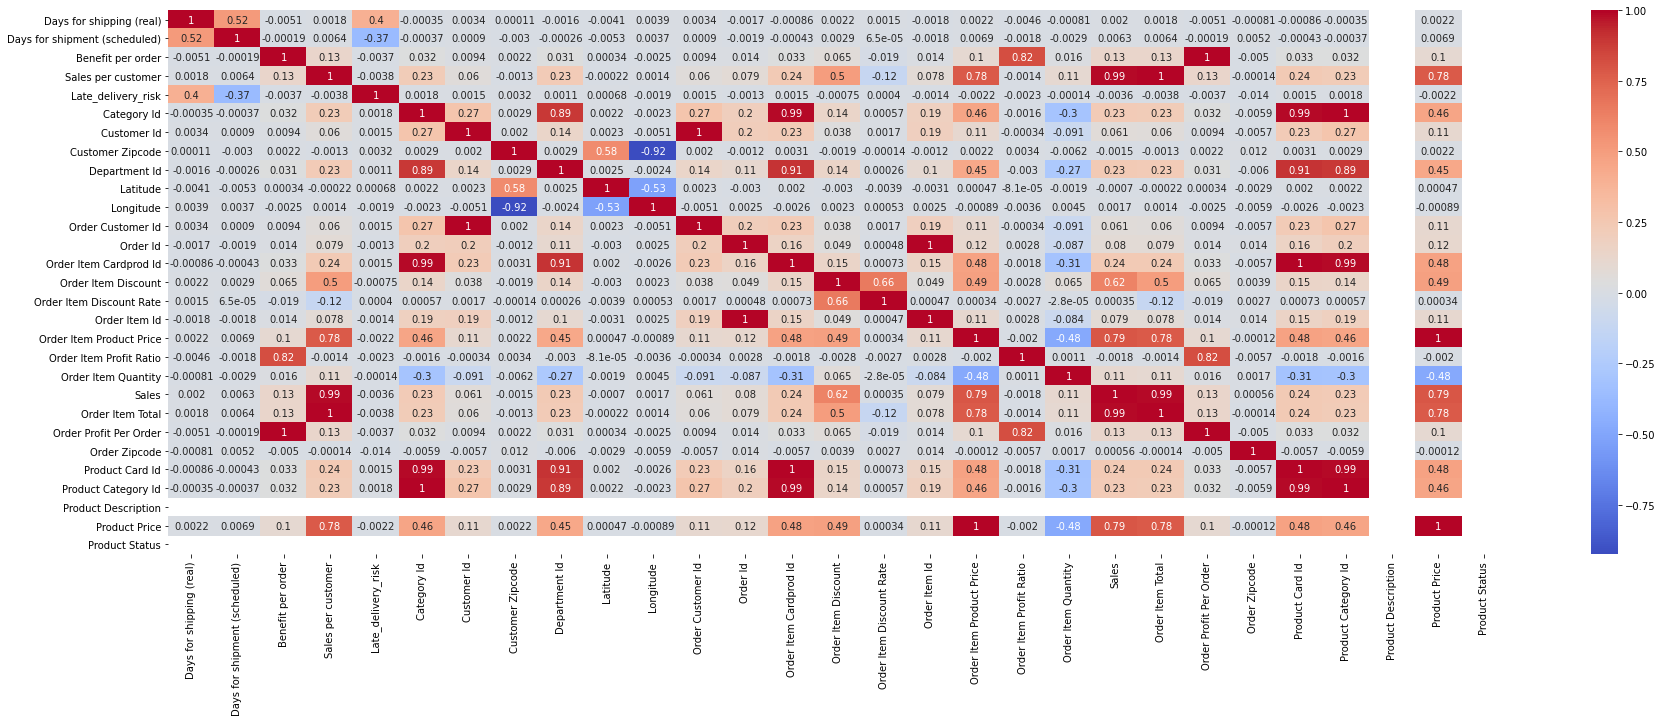

In [44]:
# 画热力图
plt.figure(figsize=(30,10))
sns.heatmap(data.corr(), annot=True, cmap='coolwarm')

In [45]:
# 按照不同的Market， Order Region
data['Market'].value_counts()

LATAM           51594
Europe          50252
Pacific Asia    41260
USCA            25799
Africa          11614
Name: Market, dtype: int64

<AxesSubplot:title={'center':'Sales in different markets'}, xlabel='Market'>

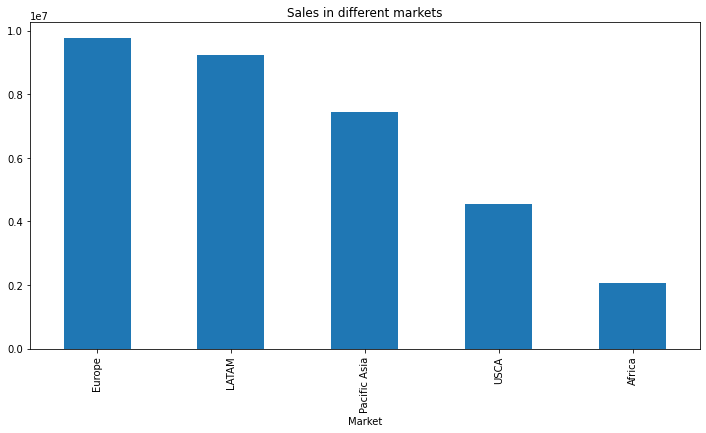

In [46]:
# 基于Market
market = data.groupby('Market')
market['Sales per customer'].sum().sort_values(ascending=False).plot.bar(figsize=(12, 6), title='Sales in different markets')

<AxesSubplot:title={'center':'Sales in different order regien'}, xlabel='Order Region'>

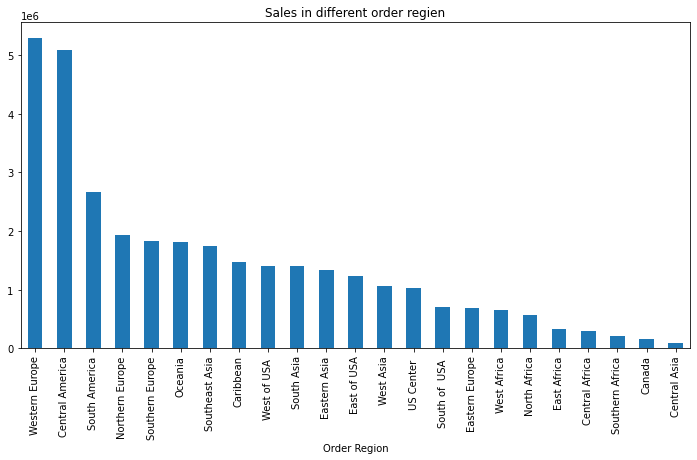

In [47]:
# 基于Order Region
region = data.groupby('Order Region')
region['Sales per customer'].sum().sort_values(ascending=False).plot.bar(figsize=(12, 6), title='Sales in different order regien')

<AxesSubplot:title={'center':'Sales in different category'}, xlabel='Category Name'>

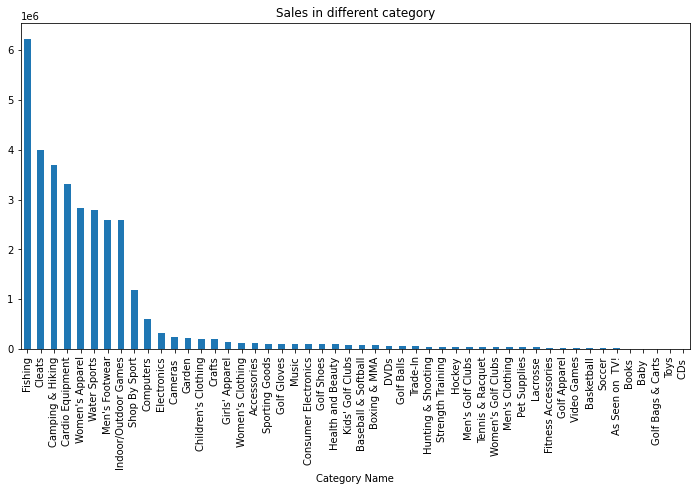

In [48]:
# 按照不同的Category Name
cat = data.groupby('Category Name')
cat['Sales per customer'].sum().sort_values(ascending=False).plot.bar(figsize=(12, 6), title='Sales in different category')

<AxesSubplot:title={'center':'Sales in different category'}, xlabel='Category Name'>

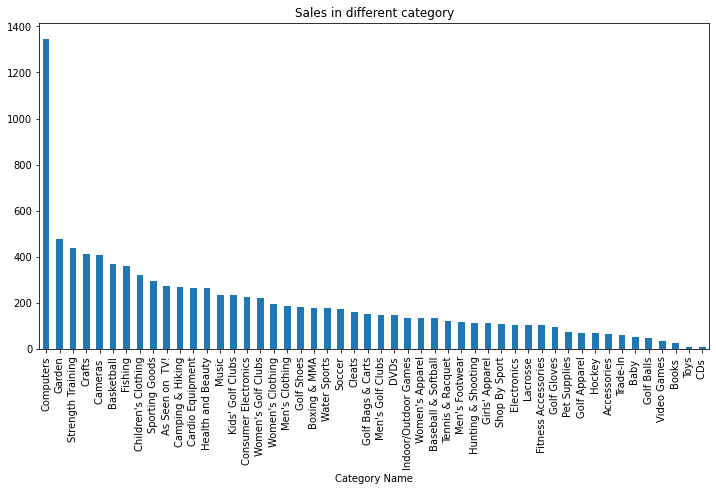

In [49]:
cat['Sales per customer'].mean().sort_values(ascending=False).plot.bar(figsize=(12, 6), title='Sales in different category')

In [50]:
# 按照不同的时间维度（年，月，日，小时）的趋势
data['order date (DateOrders)'].describe()

count             180519
unique             65752
top       3/22/2016 7:47
freq                   5
Name: order date (DateOrders), dtype: object

In [51]:
# 创建时间戳索引
temp = pd.DatetimeIndex(data['order date (DateOrders)'])
temp

DatetimeIndex(['2018-01-31 22:56:00', '2018-01-13 12:27:00',
               '2018-01-13 12:06:00', '2018-01-13 11:45:00',
               '2018-01-13 11:24:00', '2018-01-13 11:03:00',
               '2018-01-13 10:42:00', '2018-01-13 10:21:00',
               '2018-01-13 10:00:00', '2018-01-13 09:39:00',
               ...
               '2016-01-16 06:49:00', '2016-01-16 06:49:00',
               '2016-01-16 06:28:00', '2016-01-16 06:07:00',
               '2016-01-16 05:04:00', '2016-01-16 03:40:00',
               '2016-01-16 01:34:00', '2016-01-15 21:00:00',
               '2016-01-15 20:18:00', '2016-01-15 18:54:00'],
              dtype='datetime64[ns]', name='order date (DateOrders)', length=180519, freq=None)

In [52]:
# 'order date (DateOrders)' 字段中的year，month，weekday，hour，month_year
data['order_year'] = temp.year
data['order_month'] = temp.month
data['order_week_day'] = temp.weekday
data['order_hour'] = temp.hour
data['order_month_year'] = temp.to_period('M')
data[['order_year', 'order_month', 'order_week_day', 'order_hour', 'order_month_year']]

,order_year,order_month,order_week_day,order_hour,order_month_year
0,2018,1,2,22,2018-01
1,2018,1,5,12,2018-01
2,2018,1,5,12,2018-01
3,2018,1,5,11,2018-01
4,2018,1,5,11,2018-01
...,...,...,...,...,...
180514,2016,1,5,3,2016-01
180515,2016,1,5,1,2016-01
180516,2016,1,4,21,2016-01
180517,2016,1,4,20,2016-01


<AxesSubplot:title={'center':'Mean Sales in hour'}, xlabel='order_hour'>

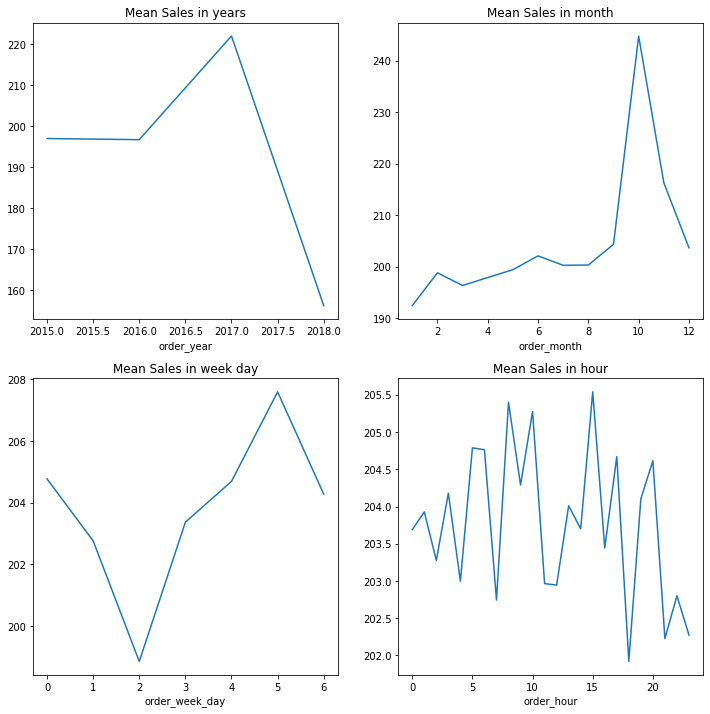

In [53]:
# 对销售额进行探索，按照不同时间维度 年，星期，小时，月
plt.figure(figsize=(10, 12))
# year
plt.subplot(2,2,1)
df_year = data.groupby('order_year')
df_year['Sales'].mean().plot(figsize=(12,12), title='Mean Sales in years')
# month
plt.subplot(2,2,2)
df_month = data.groupby('order_month')
df_month['Sales'].mean().plot(figsize=(12,12), title='Mean Sales in month')
# day
plt.subplot(2,2,3)
df_day = data.groupby('order_week_day')
df_day['Sales'].mean().plot(figsize=(12,12), title='Mean Sales in week day')
# hour
plt.subplot(2,2,4)
df_hour = data.groupby('order_hour')
df_hour['Sales'].mean().plot(figsize=(12,12), title='Mean Sales in hour')

Text(0, 0.5, 'Sales per customer')

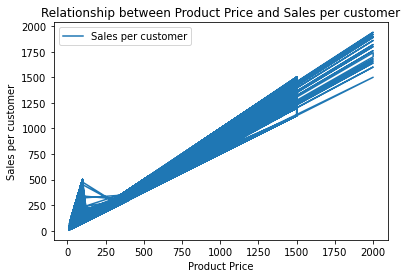

In [54]:
# product Price 与 Sales per customer 相关性
data.plot(x='Product Price', y='Sales per customer')
plt.title('Relationship between Product Price and Sales per customer')
plt.xlabel('Product Price')
plt.ylabel('Sales per customer')

Text(0, 0.5, 'Sales per customer')

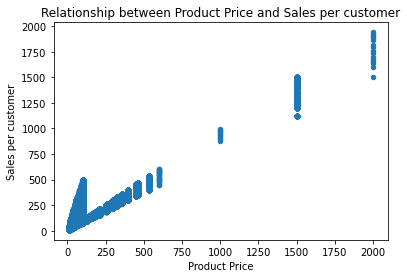

In [55]:
data.plot(x='Product Price', y='Sales per customer', kind='scatter')
plt.title('Relationship between Product Price and Sales per customer')
plt.xlabel('Product Price')
plt.ylabel('Sales per customer')

<AxesSubplot:>

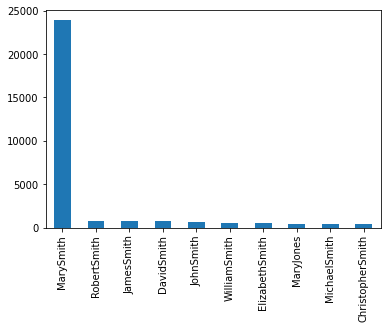

In [56]:
# 取数值最大的Top10进行条形图展示
data['Customer Full Name'].value_counts().nlargest(10).plot.bar()
